In [1]:


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio
import os
from skimage import color, io
import skimage
from importlib import reload
from matplotlib import rc
import cv2
rc('image', origin='lower')

In [2]:
photo_dir = "/Users/jesse/Data/SOC/2018-02-16 Tomografie/gesorteerd"

In [3]:
fn_format = os.path.join(photo_dir, "plak_%03d_%s%d.JPG")

In [41]:
pid = (1, 'a', 1)

In [42]:
fn_format % pid

'/Users/jesse/Data/SOC/2018-02-16 Tomografie/gesorteerd/plak_001_a1.JPG'

In [43]:
orig_img = io.imread(fn_format % pid)[::-1,:,:]

gscale_img = color.rgb2gray(orig_img)
red_img = orig_img[:,:,0]
grn_img = orig_img[:,:,1]
blu_img = orig_img[:,:,2]

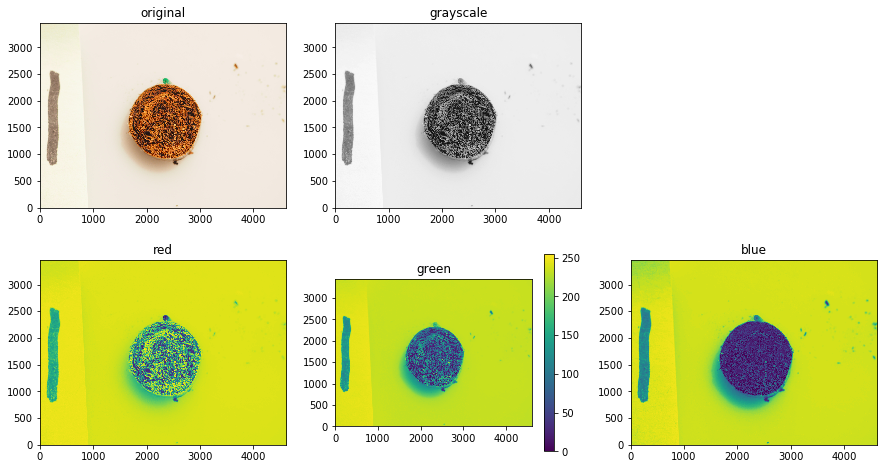

In [46]:
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.imshow(orig_img)
plt.title("original")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(232)
plt.imshow(gscale_img, cmap='gray')
plt.title("grayscale")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)


plt.subplot(234)
plt.imshow(red_img)
plt.title("red")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(235)
plt.imshow(grn_img)
plt.title("green")
plt.colorbar()
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(236)
plt.imshow(blu_img)
plt.title("blue")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.show()

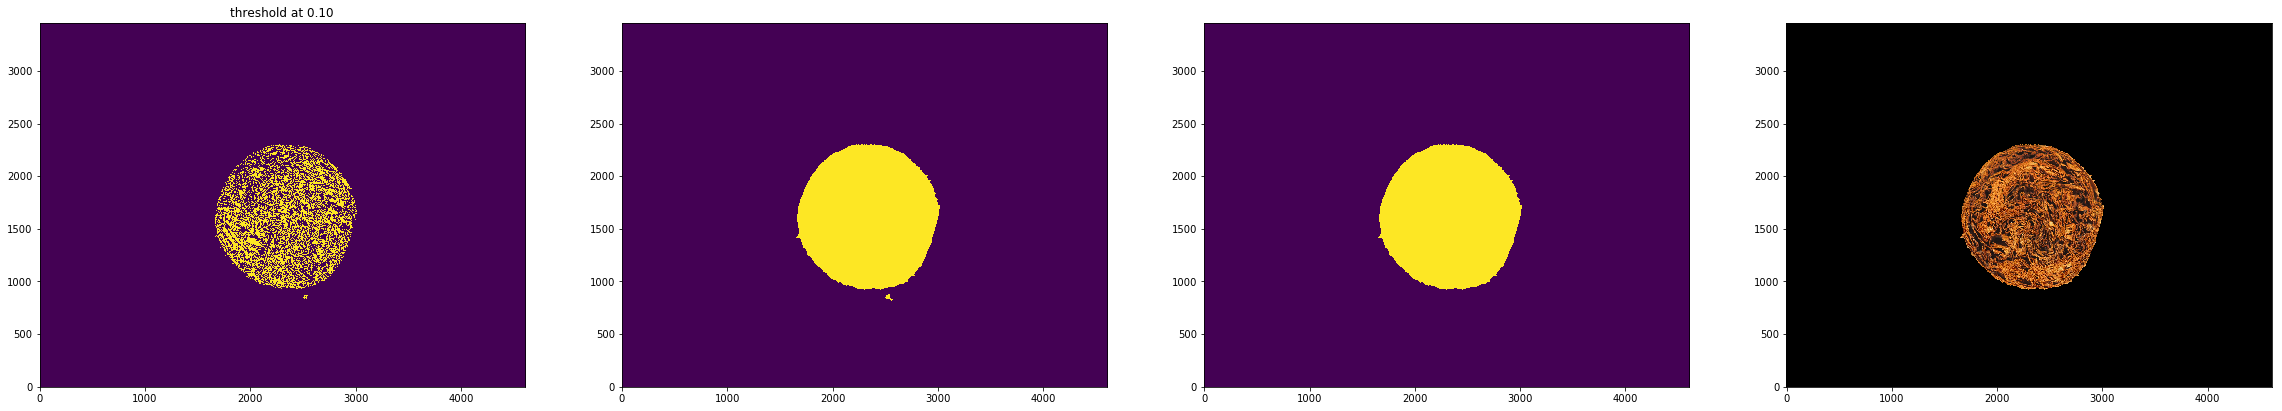

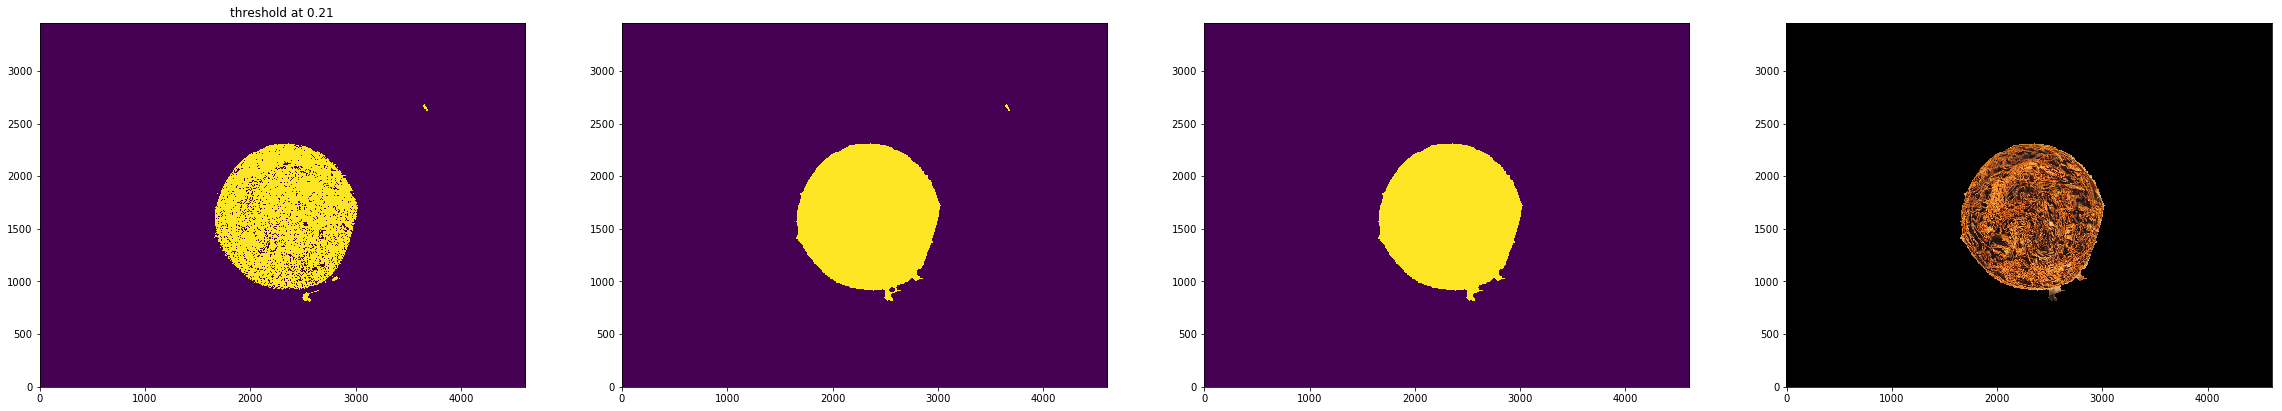

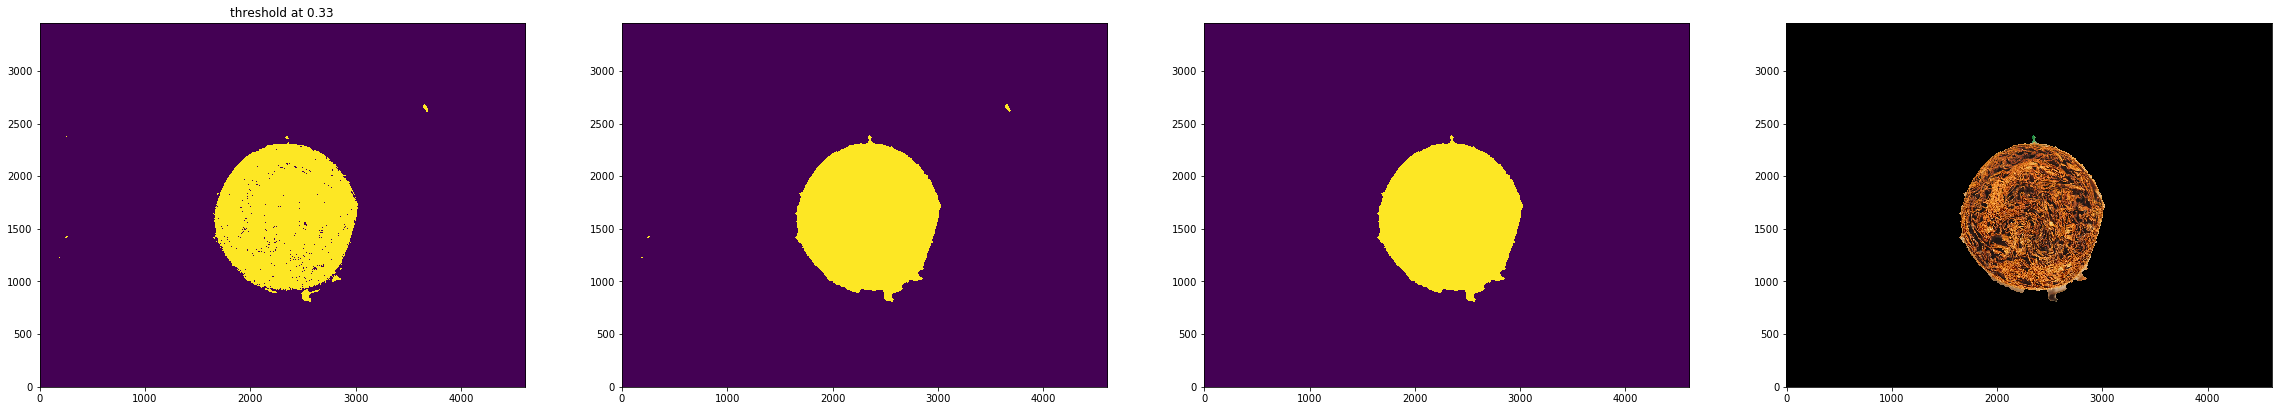

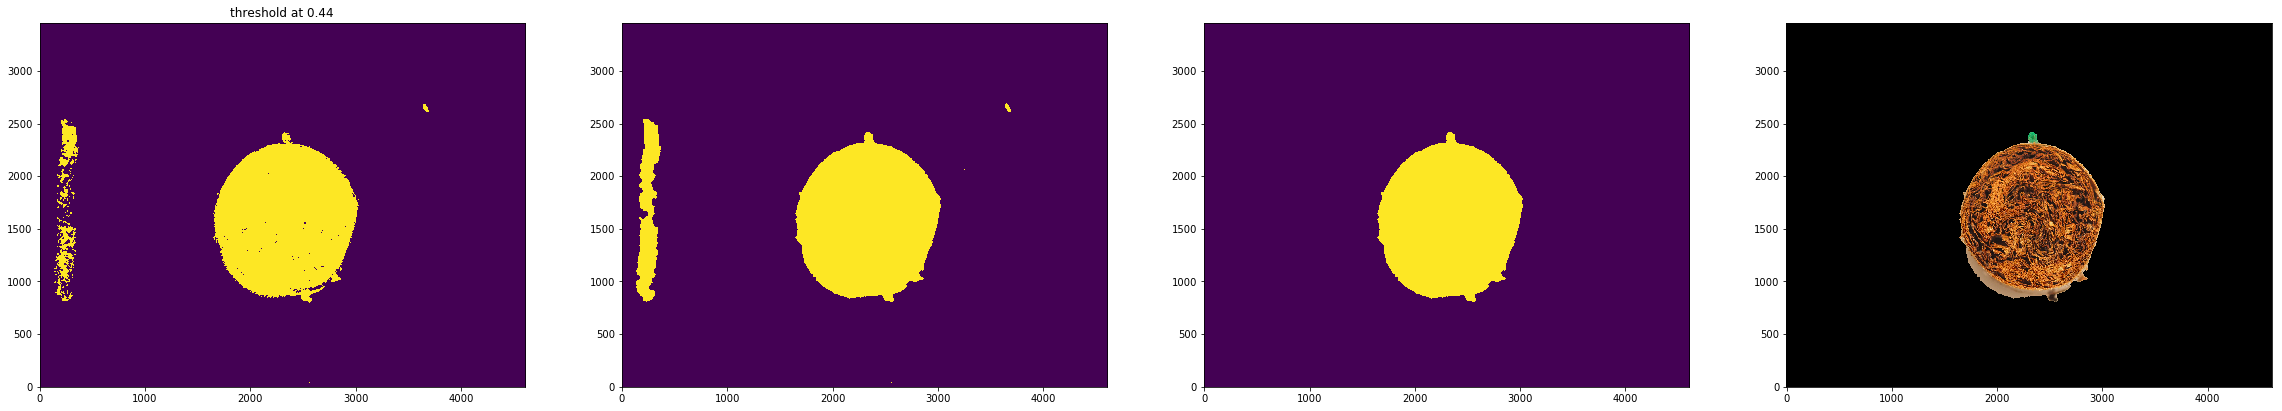

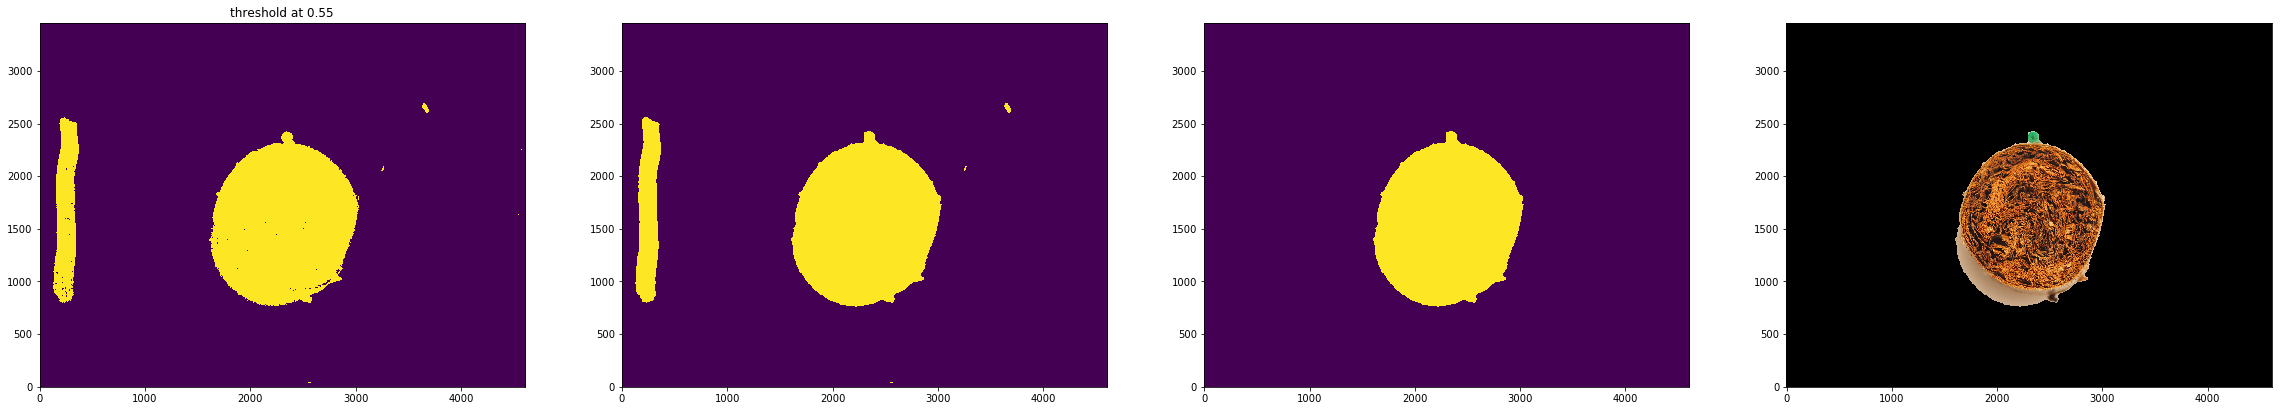

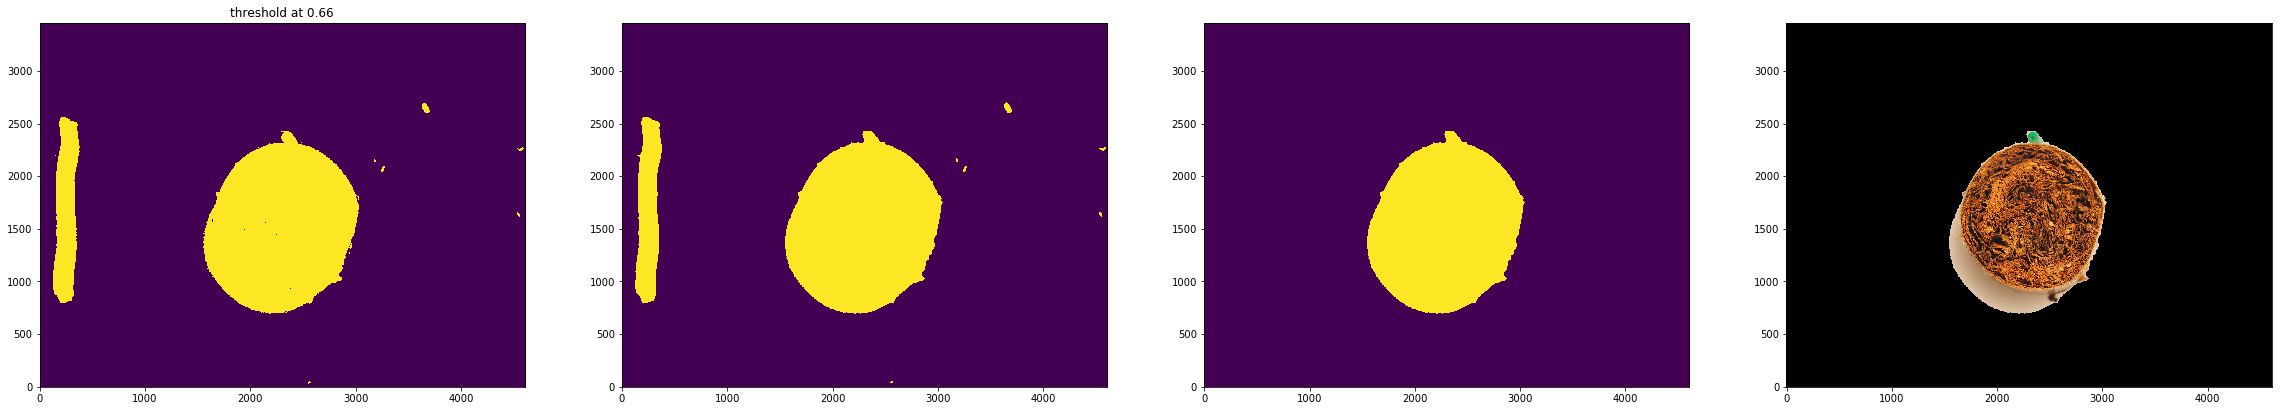

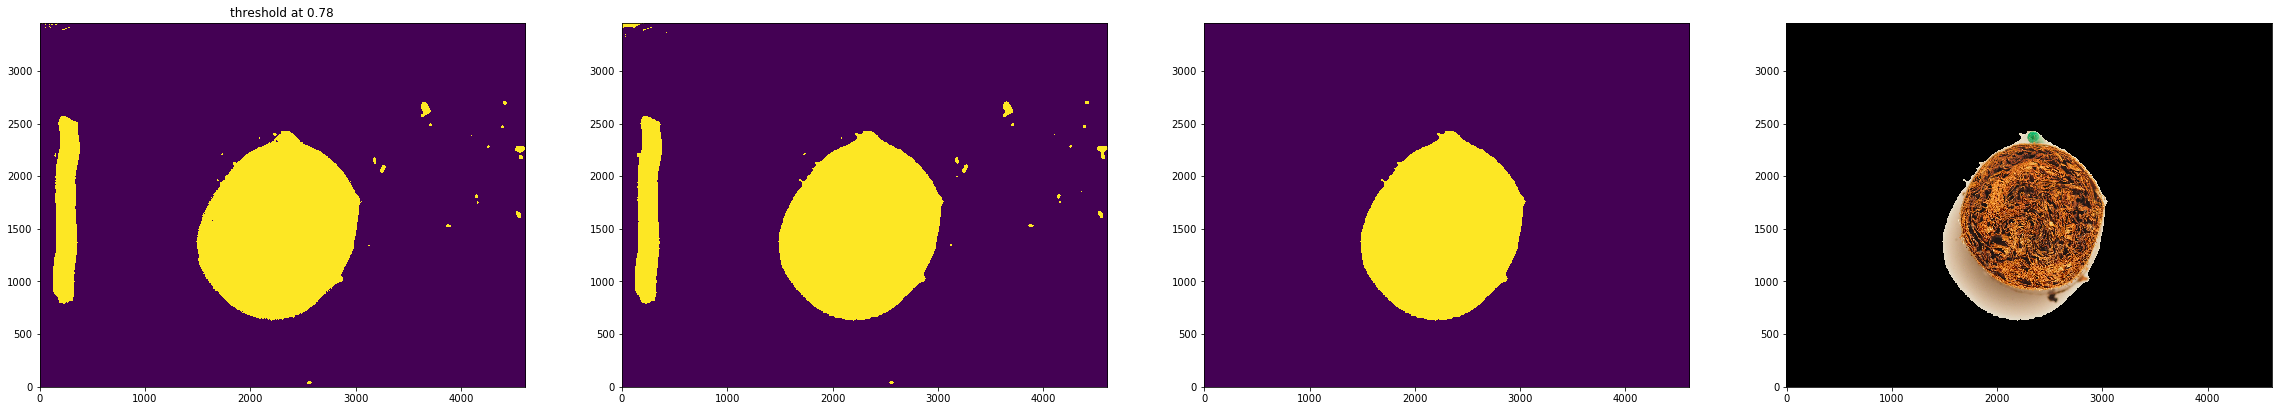

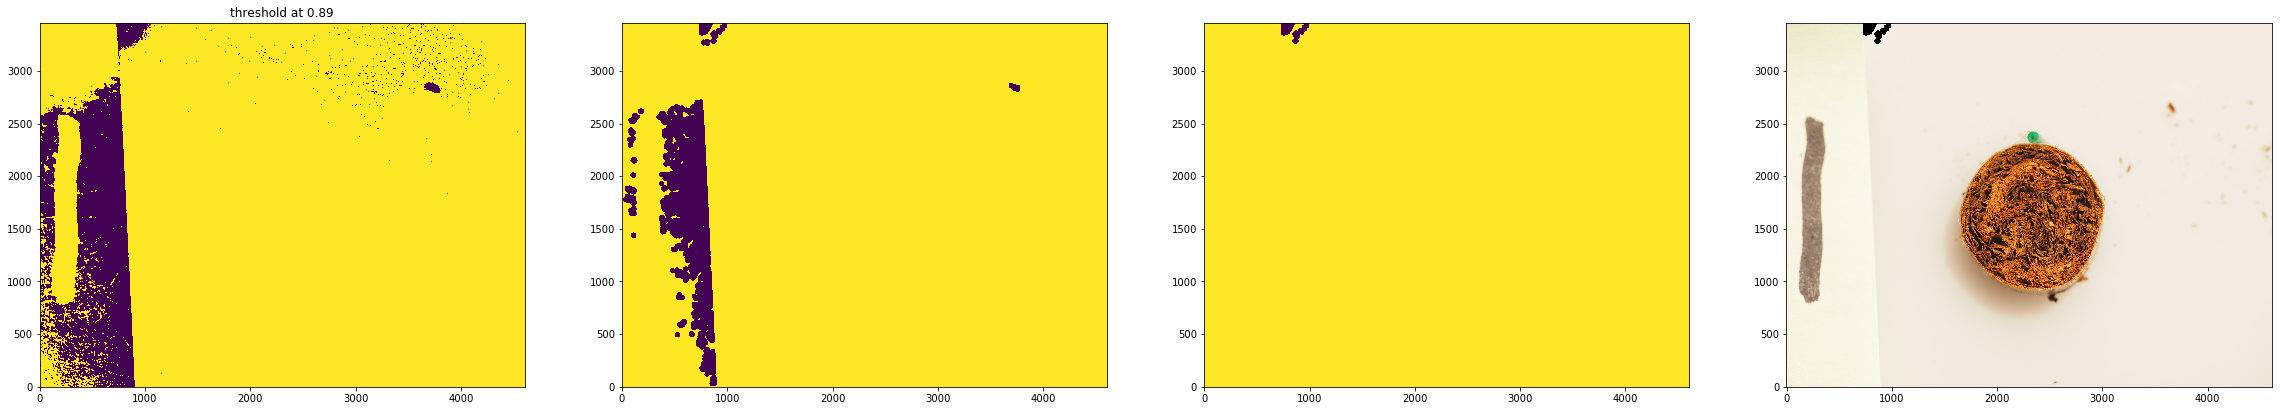

In [45]:
ths = np.linspace(0.1,1.0,8, endpoint=False)

closing_size = 50
# closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))

xs, ys = np.meshgrid(np.arange(closing_size), np.arange(closing_size))
xs = xs - ((closing_size - 1) // 2)
ys = ys - ((closing_size - 1) // 2)
rs = xs**2 + ys**2

closing_kernel = np.array((rs <= ((closing_size - 1)/ 2)**2) * 1, dtype=np.uint8)

for th in ths:
    plt.figure(figsize=(40,24))
    plt.subplot(141)
    plt.title("threshold at %.2f" % th)
    ret, bin_img = cv2.threshold(skimage.img_as_ubyte(blu_img), int(th * 255), 255, cv2.THRESH_BINARY_INV)
    plt.imshow(bin_img)
    
    closed_bimg = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, closing_kernel)
    
    plt.subplot(142)
    plt.imshow(closed_bimg)
    
    # Find the largest contour and extract it
    im, contours, hierarchy = cv2.findContours(closed_bimg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )

    maxContour = 0
    for contour in contours:
        contourSize = cv2.contourArea(contour)
        if contourSize > maxContour:
            maxContour = contourSize
            maxContourData = contour

    # Create a mask from the largest contour
    mask = np.zeros_like(bin_img)
    cv2.fillPoly(mask,[maxContourData],1)
    plt.subplot(143)
    plt.imshow(mask)
    
    # Use mask to crop data from original image
    finalImage = np.zeros_like(orig_img)
    finalImage = orig_img * mask[:,:,np.newaxis]
    plt.subplot(144)
    plt.imshow(finalImage)
    plt.show()

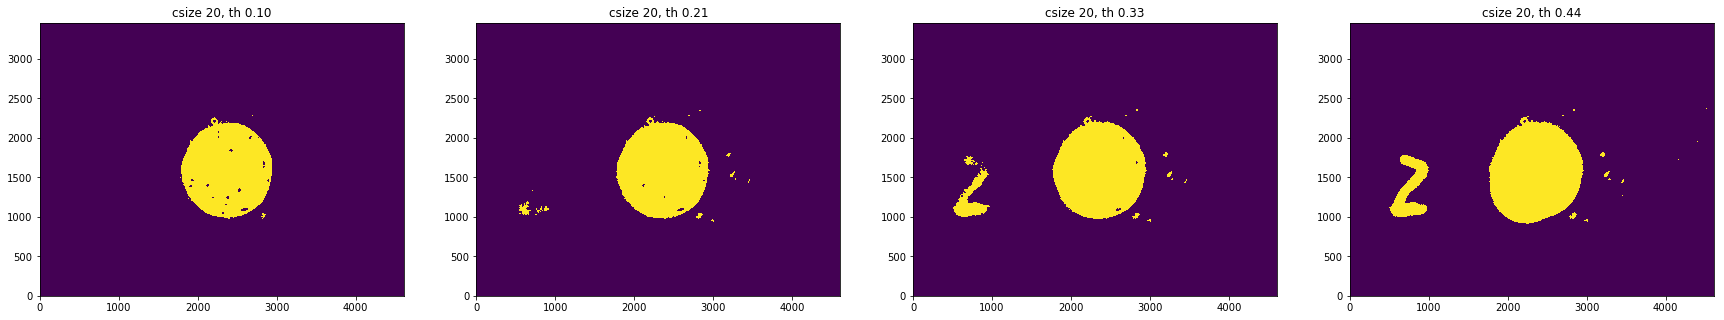

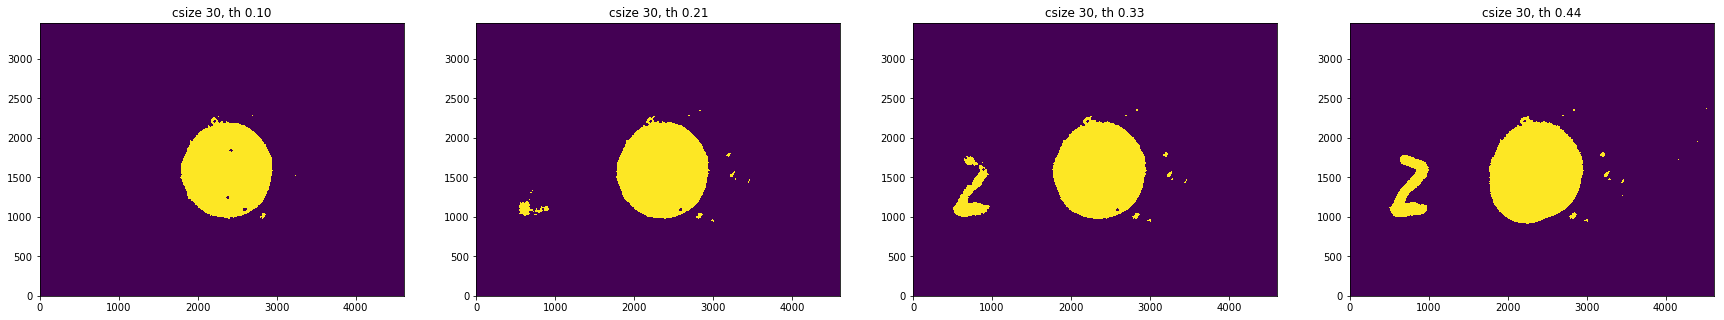

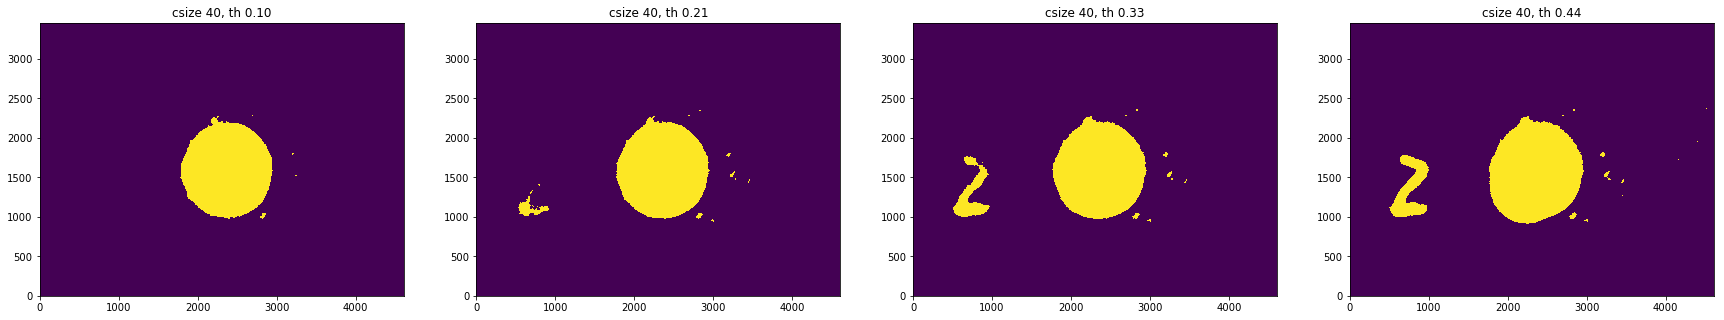

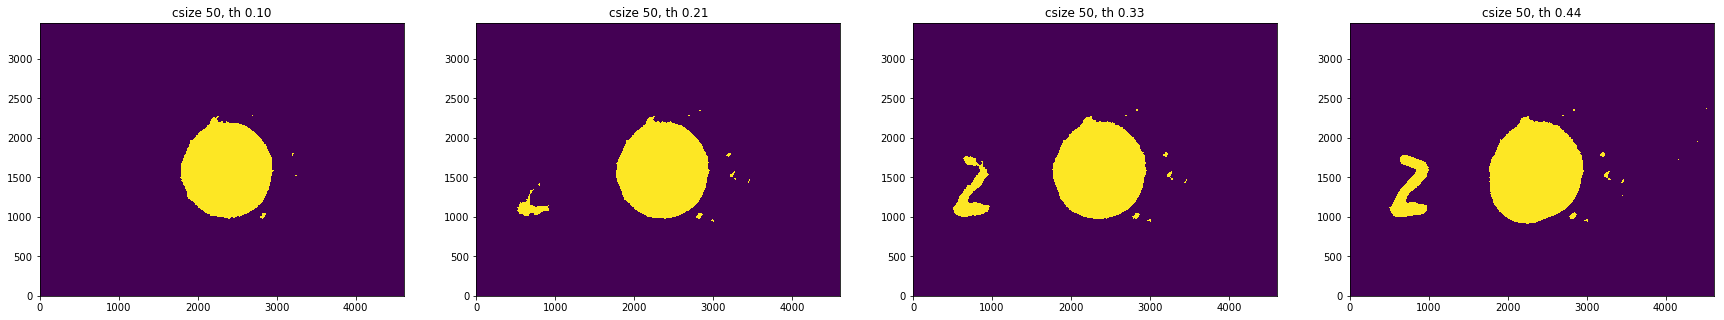

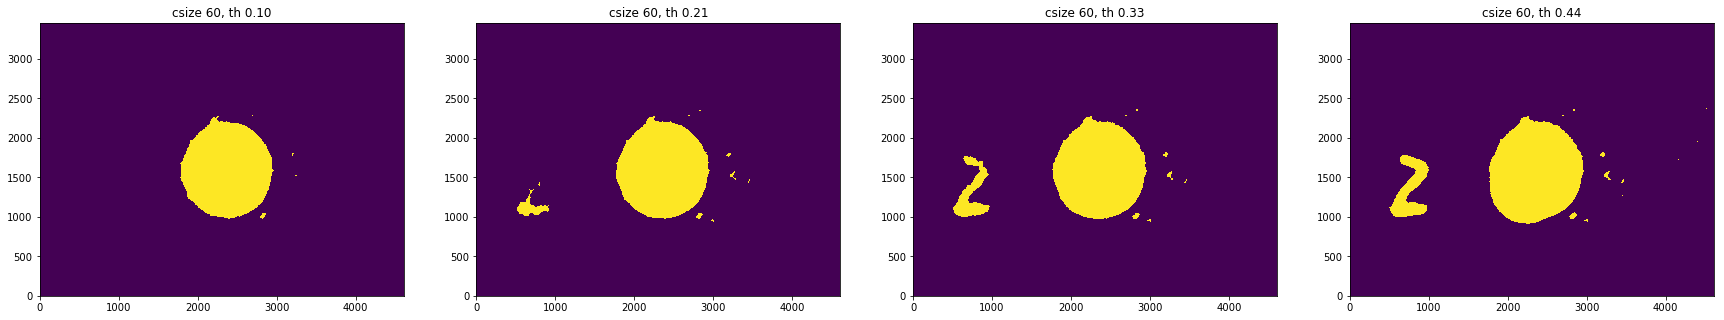

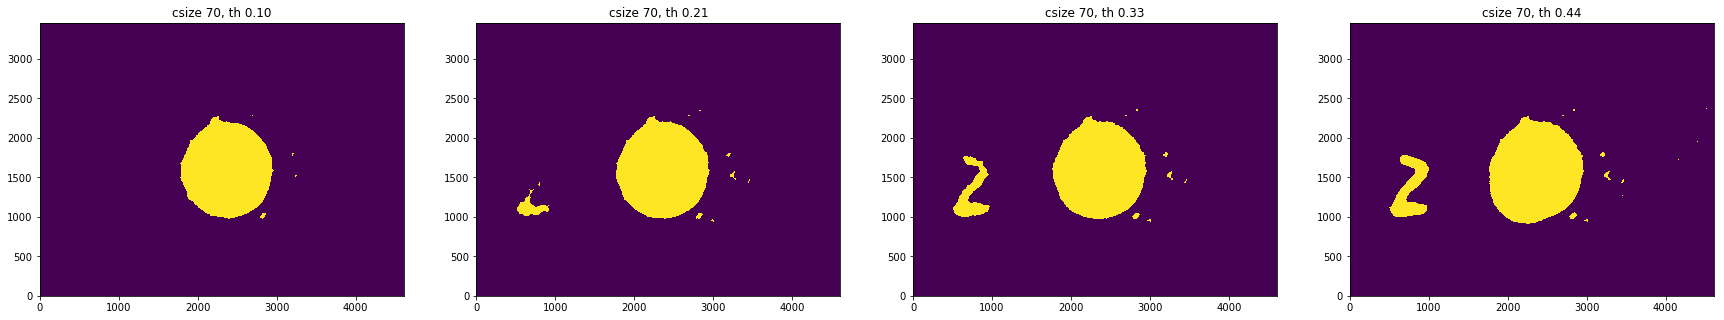

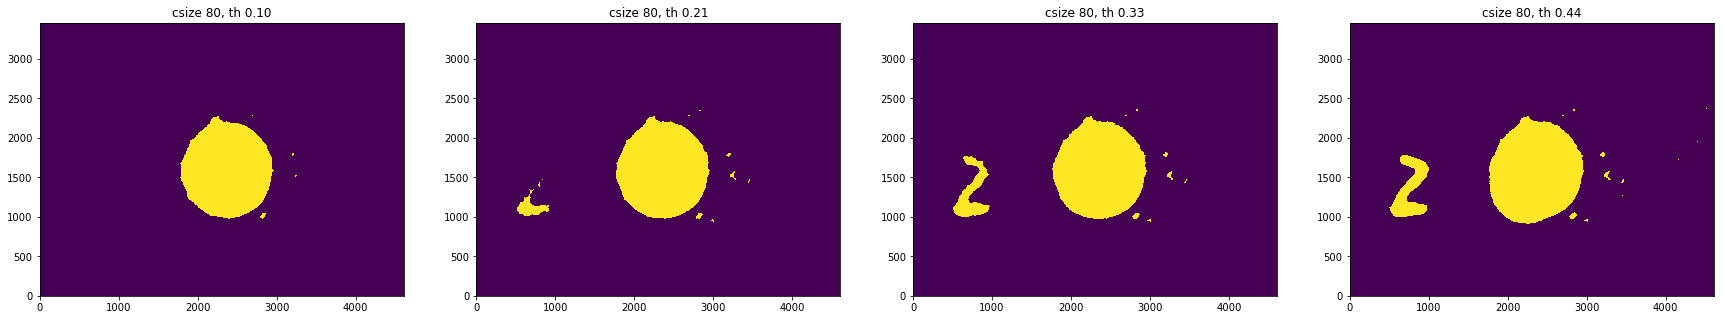

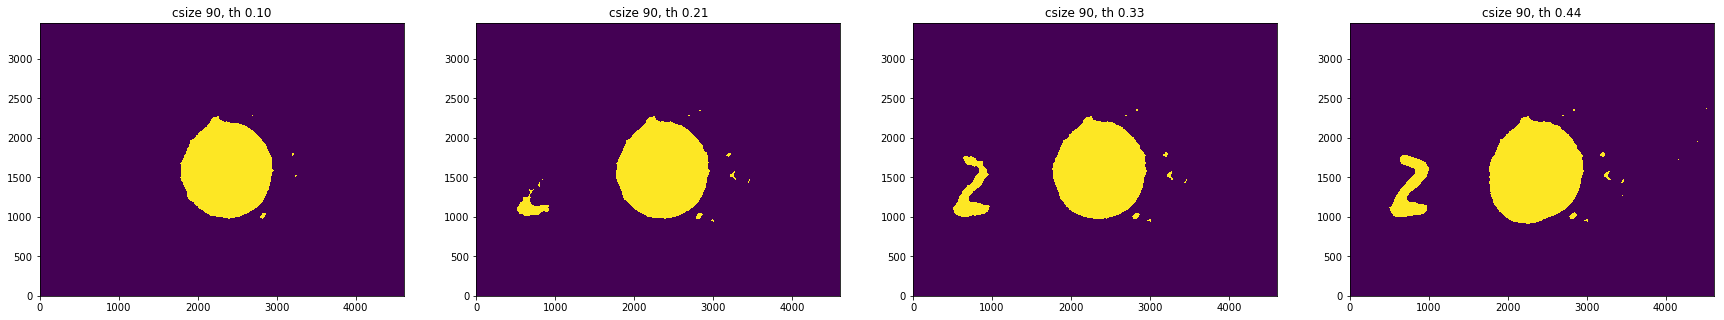

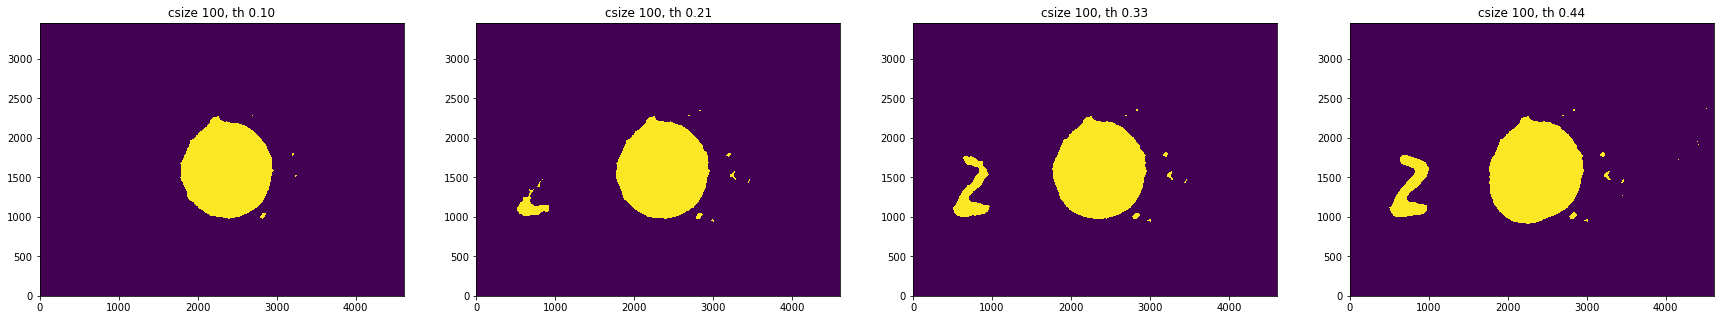

In [9]:
ths = np.linspace(0.1,1.0,8, endpoint=False)[:4]
css = [20,30,40,50,60,70,80,90,100]

for closing_size in css:
    # closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))

    xs, ys = np.meshgrid(np.arange(closing_size), np.arange(closing_size))
    xs = xs - ((closing_size - 1) // 2)
    ys = ys - ((closing_size - 1) // 2)
    rs = xs**2 + ys**2

    closing_kernel = np.array((rs <= ((closing_size - 1)/ 2)**2) * 1, dtype=np.uint8)

    plt.figure(figsize=(30,24))
    
    for i, th in enumerate(ths):
        ret, bin_img = cv2.threshold(skimage.img_as_ubyte(blu_img), int(th * 255), 255, cv2.THRESH_BINARY_INV)

        closed_bimg = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, closing_kernel)

        plt.subplot(101 + 10*len(ths) + i)
        plt.imshow(closed_bimg)
        plt.title("csize %d, th %.2f" % (closing_size, th))

#         # Find the largest contour and extract it
#         im, contours, hierarchy = cv2.findContours(bin_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )

#         maxContour = 0
#         for contour in contours:
#             contourSize = cv2.contourArea(contour)
#             if contourSize > maxContour:
#                 maxContour = contourSize
#                 maxContourData = contour

#         # Create a mask from the largest contour
#         mask = np.zeros_like(bin_img)
#         cv2.fillPoly(mask,[maxContourData],1)
#         plt.subplot(143)
#         plt.imshow(mask)

#         # Use mask to crop data from original image
#         finalImage = np.zeros_like(orig_img)
#         finalImage = orig_img * mask[:,:,np.newaxis]
#         plt.subplot(144)
#         plt.imshow(finalImage)
    plt.show()

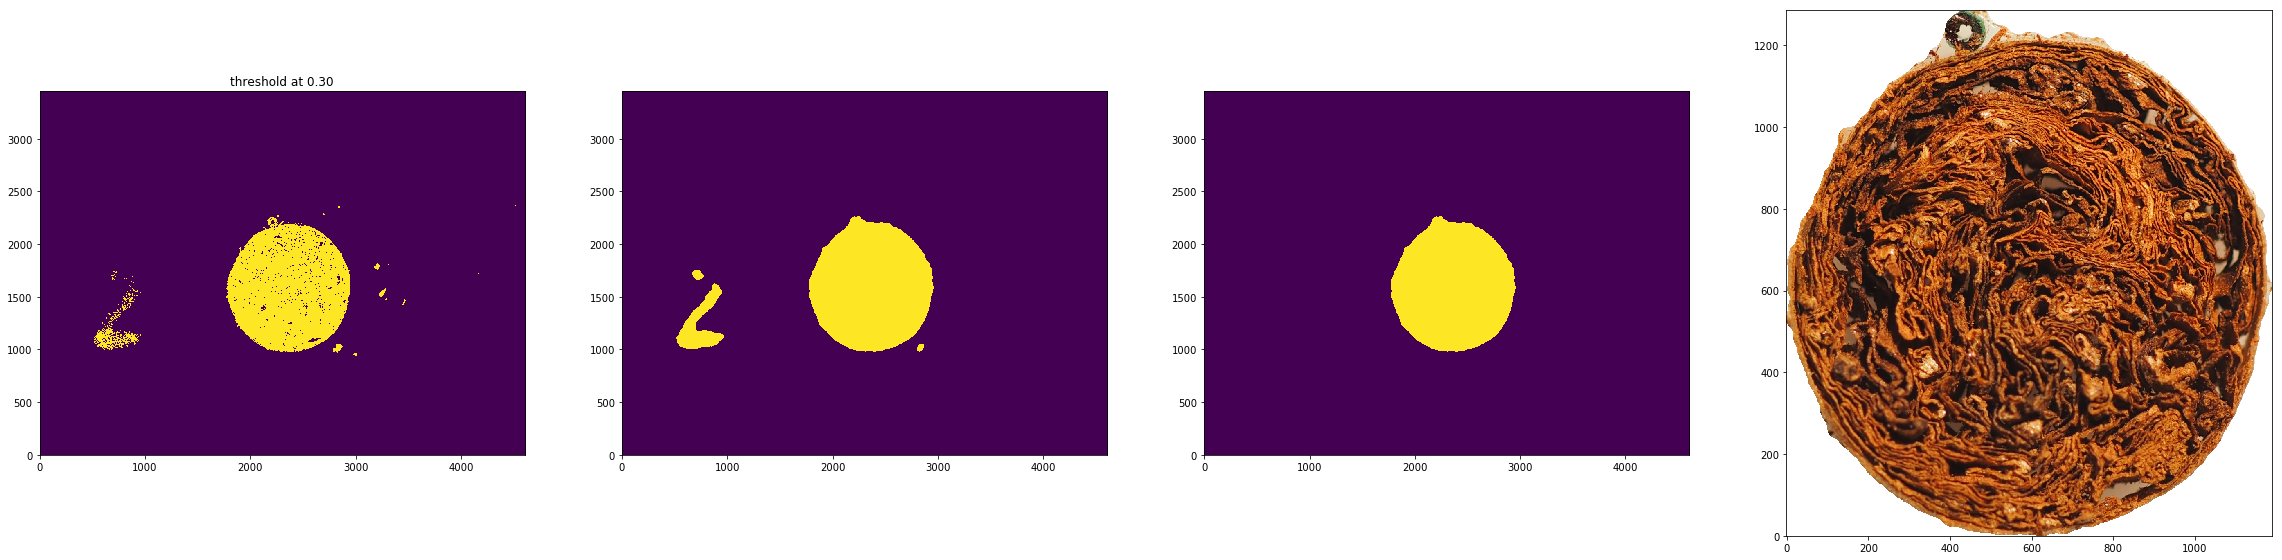

In [40]:
th = 0.3

closing_size = 50
# closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))

xs, ys = np.meshgrid(np.arange(closing_size), np.arange(closing_size))
xs = xs - ((closing_size - 1) // 2)
ys = ys - ((closing_size - 1) // 2)
rs = xs**2 + ys**2

closing_kernel = np.array((rs <= ((closing_size - 1)/ 2)**2) * 1, dtype=np.uint8)

plt.figure(figsize=(40,24))
plt.subplot(141)
plt.title("threshold at %.2f" % th)
ret, bin_img = cv2.threshold(skimage.img_as_ubyte(blu_img), int(th * 255), 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin_img)

closed_bimg = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, closing_kernel)
closed_bimg = cv2.morphologyEx(closed_bimg, cv2.MORPH_OPEN, closing_kernel)

plt.subplot(142)
plt.imshow(closed_bimg)

io.imsave("closed_bimg.png", closed_bimg)

# Find the largest contour and extract it
im, contours, hierarchy = cv2.findContours(closed_bimg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )

maxContour = 0
for contour in contours:
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour

# Create a mask from the largest contour
mask = np.zeros_like(bin_img)
cv2.fillPoly(mask,[maxContourData],1)
plt.subplot(143)
plt.imshow(mask)

# Use mask to crop data from original image
finalImage = orig_img * mask[:,:,np.newaxis] + (1-mask[:,:,np.newaxis]) * np.array([255, 255, 255], dtype=np.uint8).reshape(1,1,3)
maxc = np.amax(maxContourData[:,0,:],axis=0) + 1
minc = np.amin(maxContourData[:,0,:],axis=0)
finalImage = finalImage[minc[1]:maxc[1],minc[0]:maxc[0],:]
plt.subplot(144)
plt.imshow(finalImage)
plt.show()

io.imsave("final_img.png", finalImage[::-1,:,:])

In [21]:
bin_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
max_coords = np.amax(maxContourData[:,0,:],axis=0)
min_coords = np.amin(maxContourData[:,0,:],axis=0)

In [39]:
max_coords

array([2957, 2267], dtype=int32)